# Anime recommendation

In [4]:
import pandas as pd
import numpy as np

In [5]:
anime=pd.read_csv('anime.csv')
anime.sample(5)

,anime_id,name,genre,type,episodes,rating,members
992,25341,Diamond no Ace OVA,"Comedy, School, Shounen, Sports",OVA,3,7.72,7376
11333,28859,Shabura Rental: Ecchi na Oneesan to no Eroero ...,Hentai,OVA,1,6.81,2068
423,645,Hikaru no Go: Journey to the North Star Cup,"Game, Shounen",Special,1,8.09,13901
11330,20379,Junk Land The Animation,"Hentai, School",OVA,1,6.80,2321
10737,12037,What&#039;s Michael? 2,Comedy,OVA,1,6.14,101


In [6]:
rating=pd.read_csv('rating.csv')
rating.sample(5)

,user_id,anime_id,rating
73559,768,5079,8
308295,3160,22101,7
406677,4181,19815,8
463426,4777,3901,5
153921,1530,25259,8


In [7]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [8]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
anime.shape

(12294, 7)

In [10]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [11]:
rating.shape

(469835, 3)

In [12]:
df=pd.merge(rating,anime[['anime_id', 'name']],on='anime_id')
df.sample(5)

,user_id,anime_id,rating,name
422294,4814,747,6,Haru wo Daite Ita
358650,3294,13655,8,Little Busters!
419378,3423,8560,10,"Kyou, Koi wo Hajimemasu"
139537,791,30,8,Neon Genesis Evangelion
440023,2311,1565,8,Pokemon Diamond &amp; Pearl


In [13]:
df.shape

(469835, 4)

In [14]:
df.groupby(['name'])['rating'].mean().sort_values(ascending=False).head()

name
Arashi no Yoru ni: Himitsu no Tomodachi                                       10.0
Yokujou Bazooka The Animation                                                 10.0
Legendz: Yomigaeru Ryuuou Densetsu                                            10.0
Crayon Shin-chan Movie 23: Ora no Hikkoshi Monogatari - Saboten Daisuugeki    10.0
Dead Girl Trailer                                                             10.0
Name: rating, dtype: float64

In [15]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
Shingeki no Kyojin    2790
Sword Art Online      2722
Death Note            2551
Angel Beats!          2078
Mirai Nikki (TV)      1903
Name: rating, dtype: int64

In [16]:
rat = pd.DataFrame(df.groupby('name')['rating'].mean())
rat.head()

,rating
name,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,6.862069
&quot;Bungaku Shoujo&quot; Memoire,6.781250
&quot;Bungaku Shoujo&quot; Movie,6.513514
.hack//G.U. Returner,4.500000
.hack//G.U. Trilogy,4.632653


In [17]:
rat['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())
rat.head()

,rating,num of ratings
name,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,6.862069,29
&quot;Bungaku Shoujo&quot; Memoire,6.781250,32
&quot;Bungaku Shoujo&quot; Movie,6.513514,74
.hack//G.U. Returner,4.500000,32
.hack//G.U. Trilogy,4.632653,49


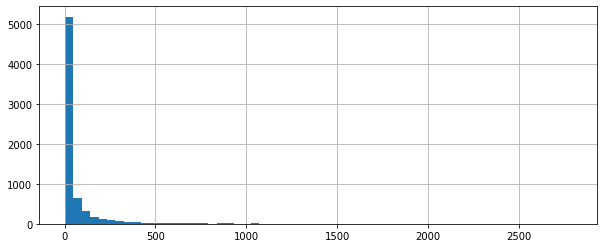

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
rat['num of ratings'].hist(bins=60)

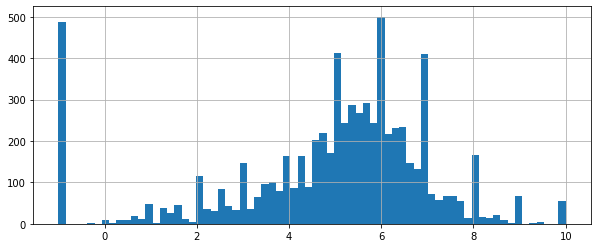

In [19]:
plt.figure(figsize=(10,4))
rat['rating'].hist(bins=70)

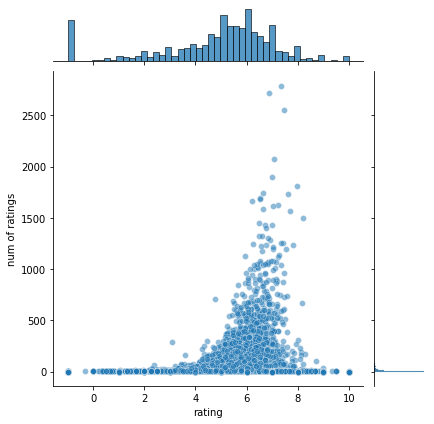

In [20]:
import seaborn as sns
sns.jointplot(x='rating',y='num of ratings',data=rat,alpha=0.5)

Creating a pivot table where we will map the user with the movie he has rated 

In [21]:
anime_mat=pd.pivot_table(data=df,index='user_id',columns=['name'],values='rating')
anime_mat.head()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Tasogare no Udewa Densetsu: Offline de Aimashou,.hack//The Movie: Sekai no Mukou ni,.hack//Unison,.hack//Versus: The Thanatos Report,009 Re:Cyborg,009-1,009-1: R&amp;B,00:08,07-Ghost,1+2=Paradise,100-man-nen Chikyuu no Tabi: Bander Book,1001 Nights,11-nin Iru!,11eyes,11eyes Picture Drama,11eyes: Momoiro Genmutan,12-sai.,12-sai.: Chicchana Mune no Tokimeki,15 Bishoujo Hyouryuuki,20-dai no Heya-hen,21-ji no Onna: Newscaster Katsuragi Miki,2x1,3 Choume no Tama: Uchi no Tama Shirimasenka?,3-gatsu no Lion meets Bump of Chicken,30-sai no Hoken Taiiku,30-sai no Hoken Taiiku Specials,...,Zettai Shougeki: Platonic Heart Picture Drama,Zettai Shounen,Zipang,Zoids,Zoids Fuzors,Zoids Genesis,Zoids Shinseiki/Zero,Zoku Koihime,Zoku Natsume Yuujinchou,Zoku Natsume Yuujinchou: 3D Nyanko-sensei Gekijou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zombie-Loan Specials,"Zone of the Enders: Dolores, I",Zone of the Enders: Idolo,Zonmi-chan: Meat Pie of the Dead,Zukkoke Knight: Don De La Mancha,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,_Summer,eX-Driver,eX-Driver the Movie,eX-Driver: Nina &amp; Rei Danger Zone,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,fake!fake!,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''anime_mat.to_csv('anime_matrix.csv')''' # saving the file for backup purpose

"anime_mat.to_csv('anime_matrix.csv')"

In [23]:
#anime_mat=pd.read_csv('anime_matrix.csv')
anime_mat.sample()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Tasogare no Udewa Densetsu: Offline de Aimashou,.hack//The Movie: Sekai no Mukou ni,.hack//Unison,.hack//Versus: The Thanatos Report,009 Re:Cyborg,009-1,009-1: R&amp;B,00:08,07-Ghost,1+2=Paradise,100-man-nen Chikyuu no Tabi: Bander Book,1001 Nights,11-nin Iru!,11eyes,11eyes Picture Drama,11eyes: Momoiro Genmutan,12-sai.,12-sai.: Chicchana Mune no Tokimeki,15 Bishoujo Hyouryuuki,20-dai no Heya-hen,21-ji no Onna: Newscaster Katsuragi Miki,2x1,3 Choume no Tama: Uchi no Tama Shirimasenka?,3-gatsu no Lion meets Bump of Chicken,30-sai no Hoken Taiiku,30-sai no Hoken Taiiku Specials,...,Zettai Shougeki: Platonic Heart Picture Drama,Zettai Shounen,Zipang,Zoids,Zoids Fuzors,Zoids Genesis,Zoids Shinseiki/Zero,Zoku Koihime,Zoku Natsume Yuujinchou,Zoku Natsume Yuujinchou: 3D Nyanko-sensei Gekijou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zombie-Loan Specials,"Zone of the Enders: Dolores, I",Zone of the Enders: Idolo,Zonmi-chan: Meat Pie of the Dead,Zukkoke Knight: Don De La Mancha,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,_Summer,eX-Driver,eX-Driver the Movie,eX-Driver: Nina &amp; Rei Danger Zone,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,fake!fake!,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
similar_to_movie=anime_mat['.hack//Gift']
similar_to_movie.head()

user_id
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: .hack//Gift, dtype: float64

In [26]:
similar = anime_mat.corrwith(similar_to_movie)
correlation= pd.DataFrame(similar,columns=['Correlation'])
correlation.dropna(inplace=True)
correlation.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
name,
&quot;Bungaku Shoujo&quot; Movie,-0.866025
.hack//G.U. Returner,0.981752
.hack//G.U. Trilogy,0.852510
.hack//G.U. Trilogy: Parody Mode,0.991189
.hack//Gift,1.000000


In [27]:
correlation.sort_values('Correlation',ascending=False).head(10)

,Correlation
name,
Komori-san wa Kotowarenai!,1.0
Kanojo to Kanojo no Neko,1.0
Wizard Barristers: Benmashi Cecil,1.0
Kamen no Maid Guy,1.0
Kami nomi zo Shiru Sekai: Flag 0,1.0
Kamisama Hajimemashita: Kako-hen,1.0
Kamisama Hajimemashita◎,1.0
Kannagi,1.0
Kantai Collection: KanColle,1.0


In [29]:
correlation = correlation.join(rat['num of ratings'])
correlation.head()

,Correlation,num of ratings
name,,
&quot;Bungaku Shoujo&quot; Movie,-0.866025,74
.hack//G.U. Returner,0.981752,32
.hack//G.U. Trilogy,0.852510,49
.hack//G.U. Trilogy: Parody Mode,0.991189,10
.hack//Gift,1.000000,29


Sometime there will be high rating due to number of person who have rated the anime is less 

In [31]:
correlation[correlation['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
name,,
Senjou no Valkyria,1.0,123
Digimon Adventure tri. 1: Saikai,1.0,130
Berserk: Ougon Jidai-hen III - Kourin,1.0,187
Ranma ½,1.0,133
Sabagebu!,1.0,181
